In [27]:
#basic import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("mps")
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('weather_classification_data.csv')

In [3]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [6]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Wind_flow'] = df['Wind Speed'].apply(lambda x : x>0)

In [10]:
df['Wind_flow'].value_counts()

Wind_flow
True     13030
False      170
Name: count, dtype: int64

In [11]:
num_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Atmospheric Pressure', 'UV Index','Visibility (km)']
cat_cols = ['Cloud Cover','Season','Location','Wind_flow']
target_col = ['Weather Type']

In [12]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type', 'Wind_flow'],
      dtype='object')

In [13]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  Wind_flow  
0        Rainy       True  
1       Cloudy       True  
2        Sunny       True  
3        Sunny       True  
4        Rainy       True

In [14]:
def plot_box(df):
    numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Atmospheric Pressure', 'UV Index','Visibility (km)']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(20,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='Weather Type',y=column,data=df,palette='rocket', linewidth=2.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

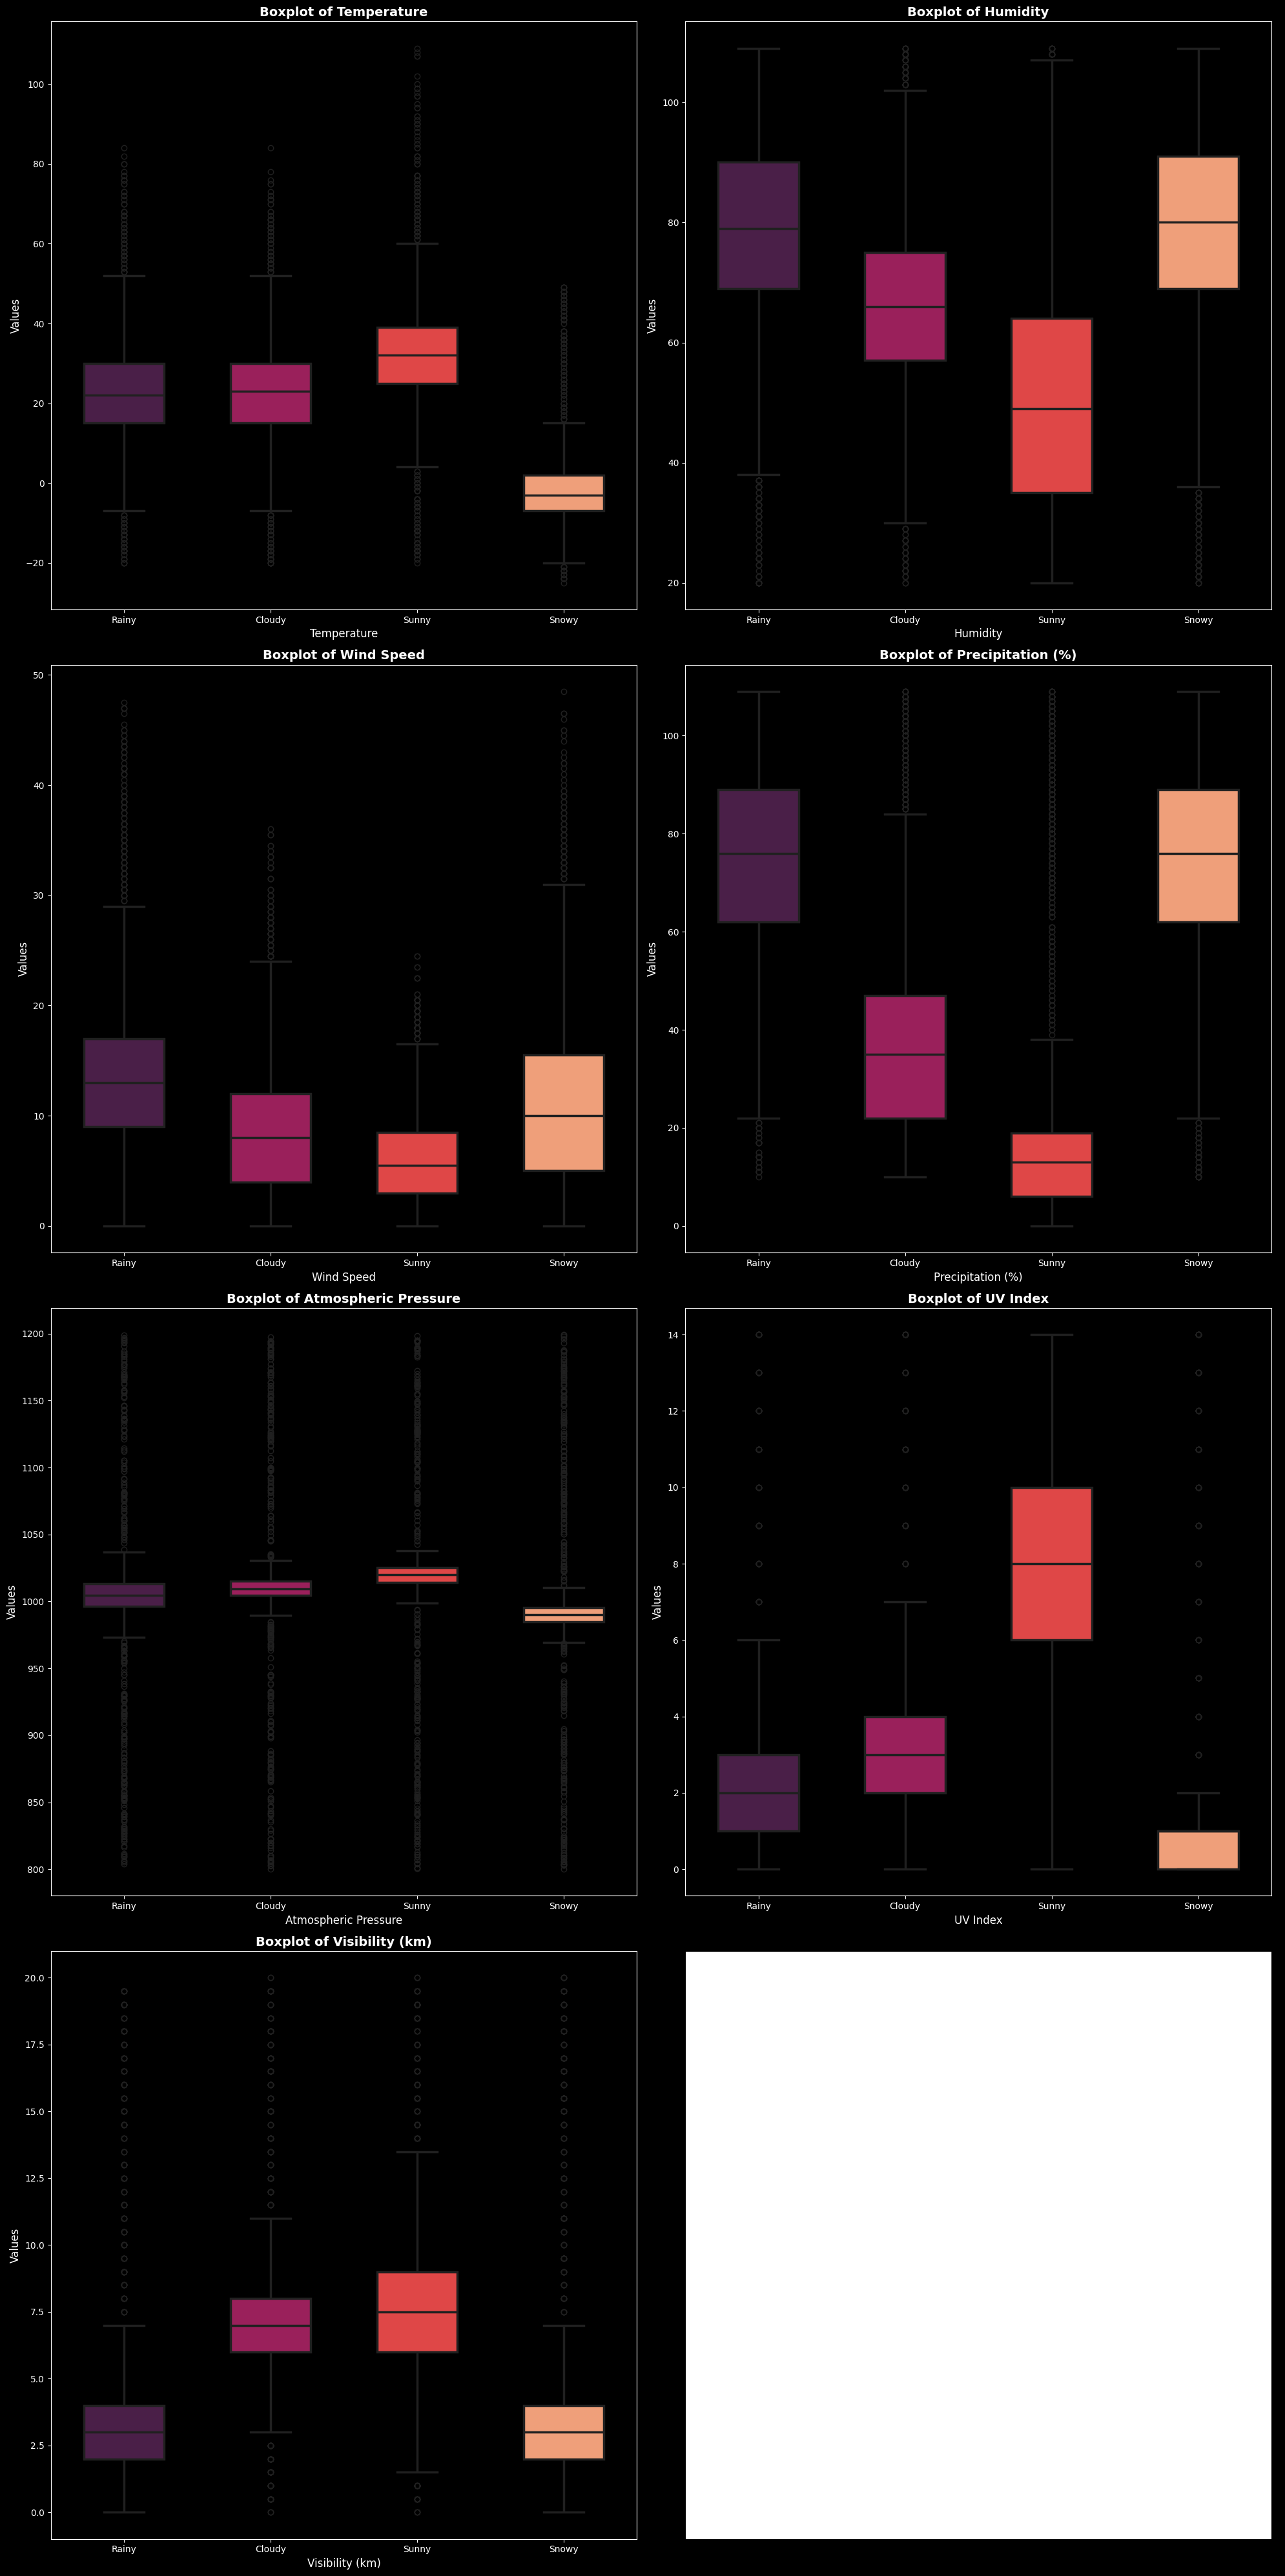

In [15]:
plot_box(df)

In [16]:
def plot_hist(df):
    numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Atmospheric Pressure', 'UV Index','Visibility (km)']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(20,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='viridis_r',ax=ax,bins=70,kde=True,hue='Weather Type')
        ax.set_title(f'Dist Plot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

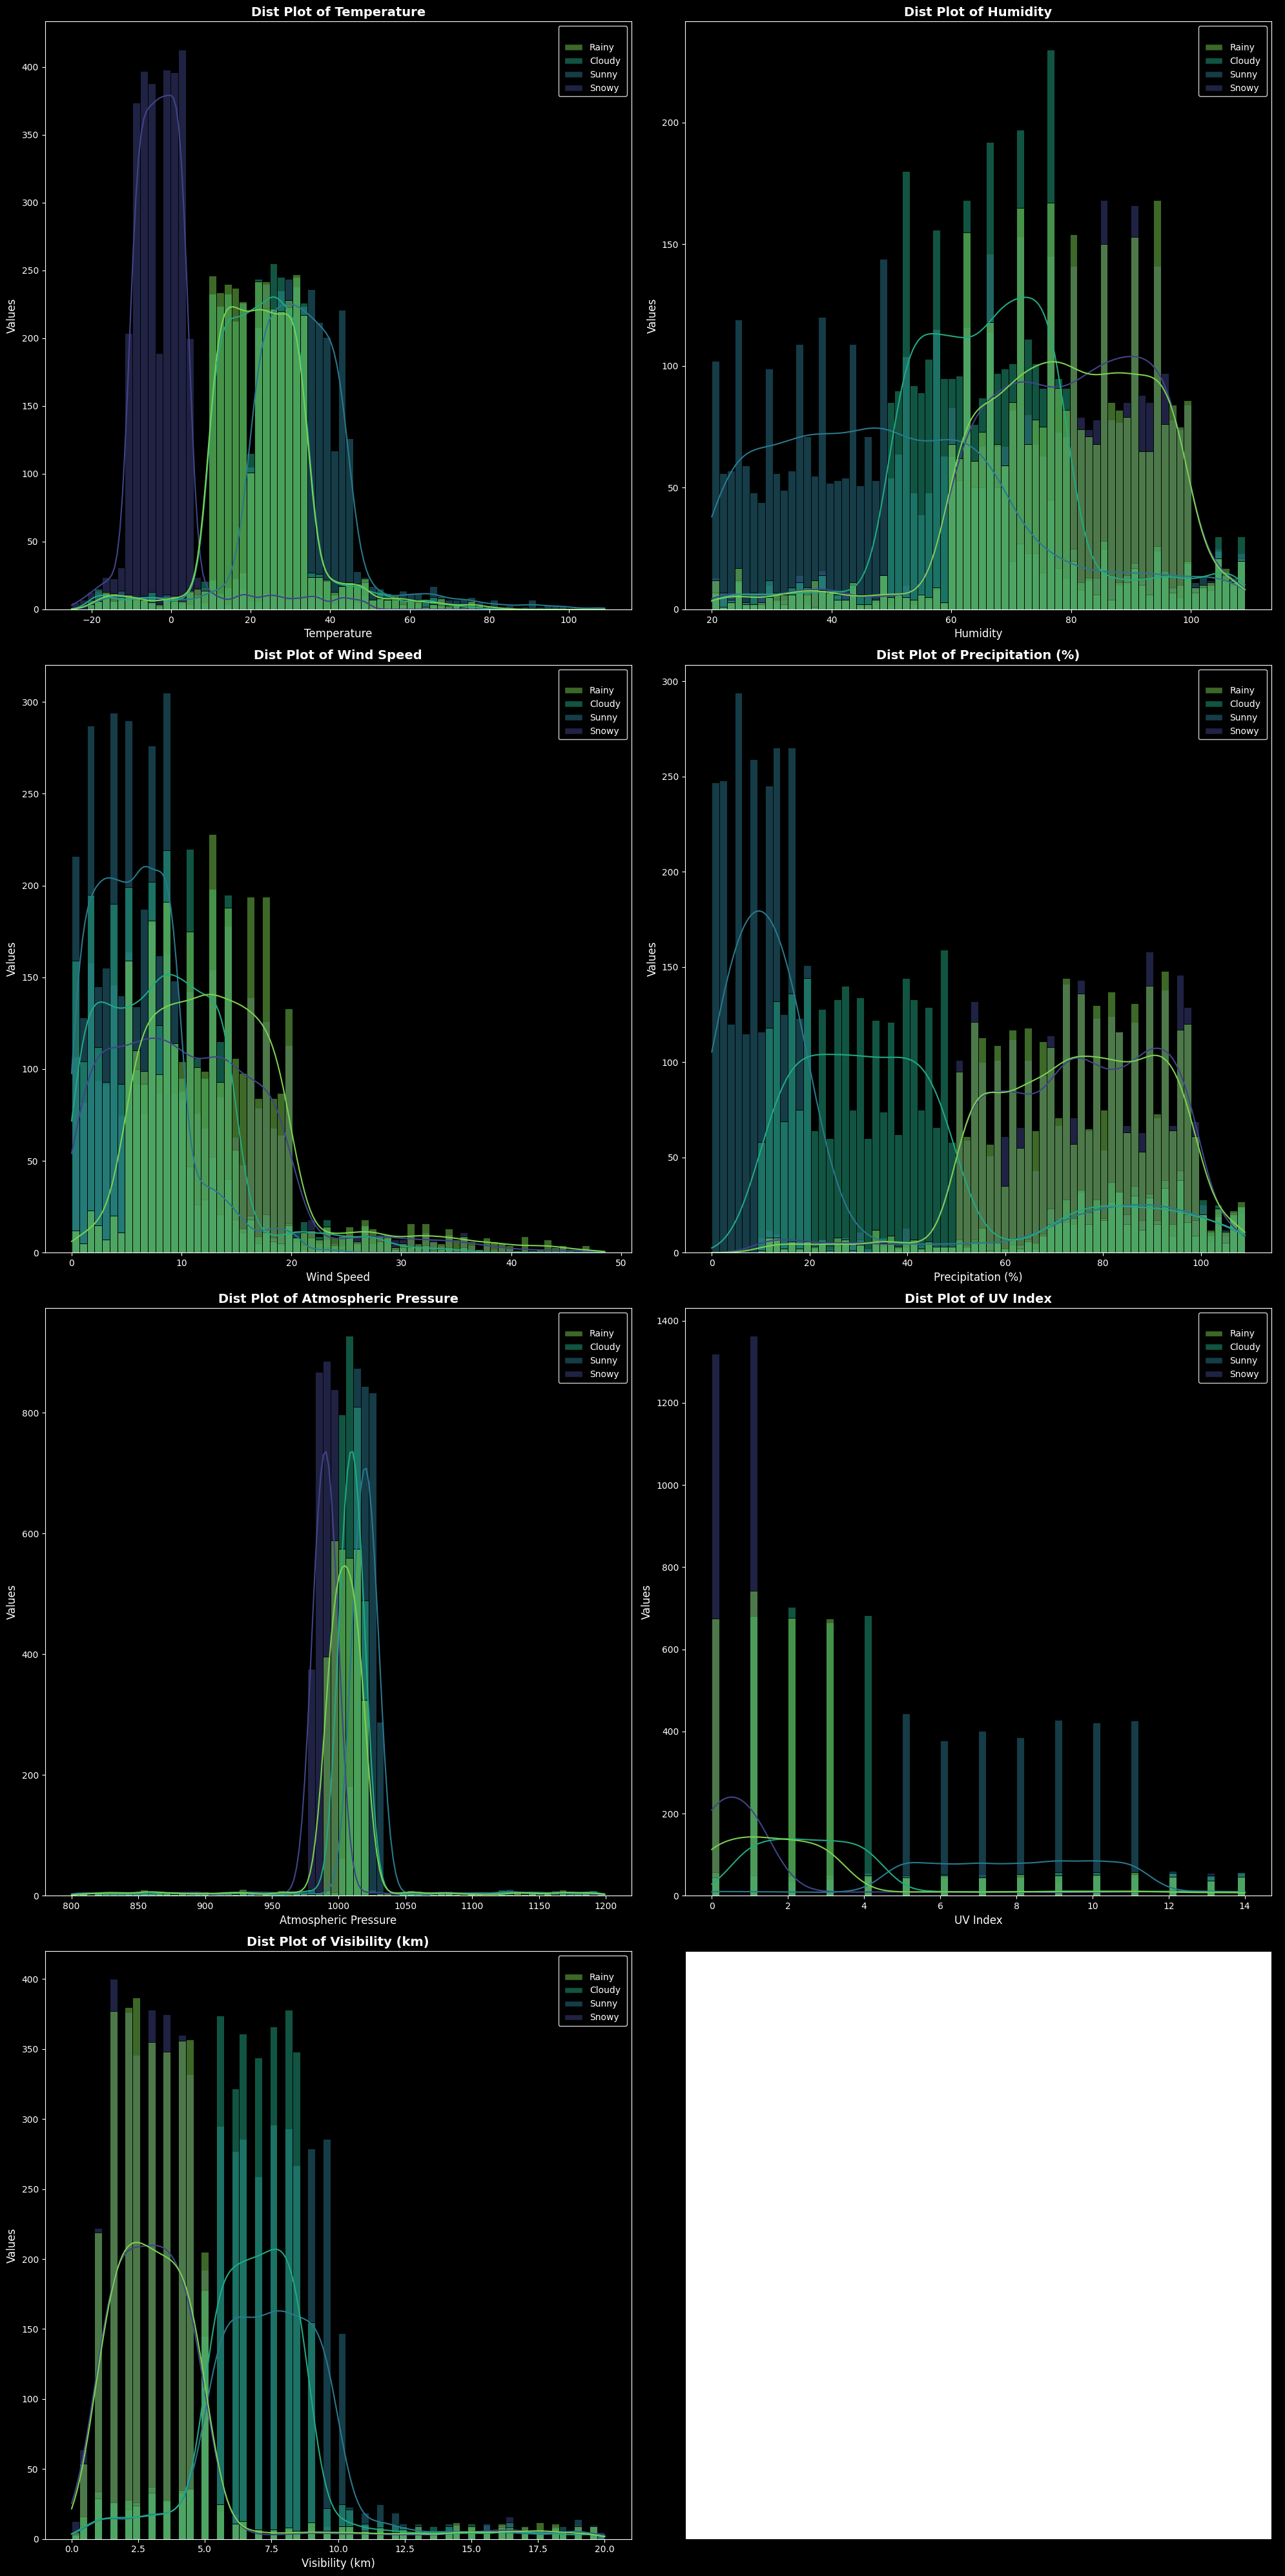

In [17]:
plot_hist(df)

In [18]:
def plot_count(df):
    cat_cols = ['Cloud Cover','Season','Location','Wind_flow','Weather Type']
    num_plots = len(cat_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(12,12),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(cat_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.countplot(x=df[column],palette='Spectral',ax=ax)
        ax.set_title(f'Distplot of {column}', color='white', fontsize=8, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=7)
        ax.set_ylabel('Values', color='white', fontsize=7)
        
        ax.tick_params(axis='x', colors='white', labelsize=6)
        ax.tick_params(axis='y', colors='white', labelsize=6)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

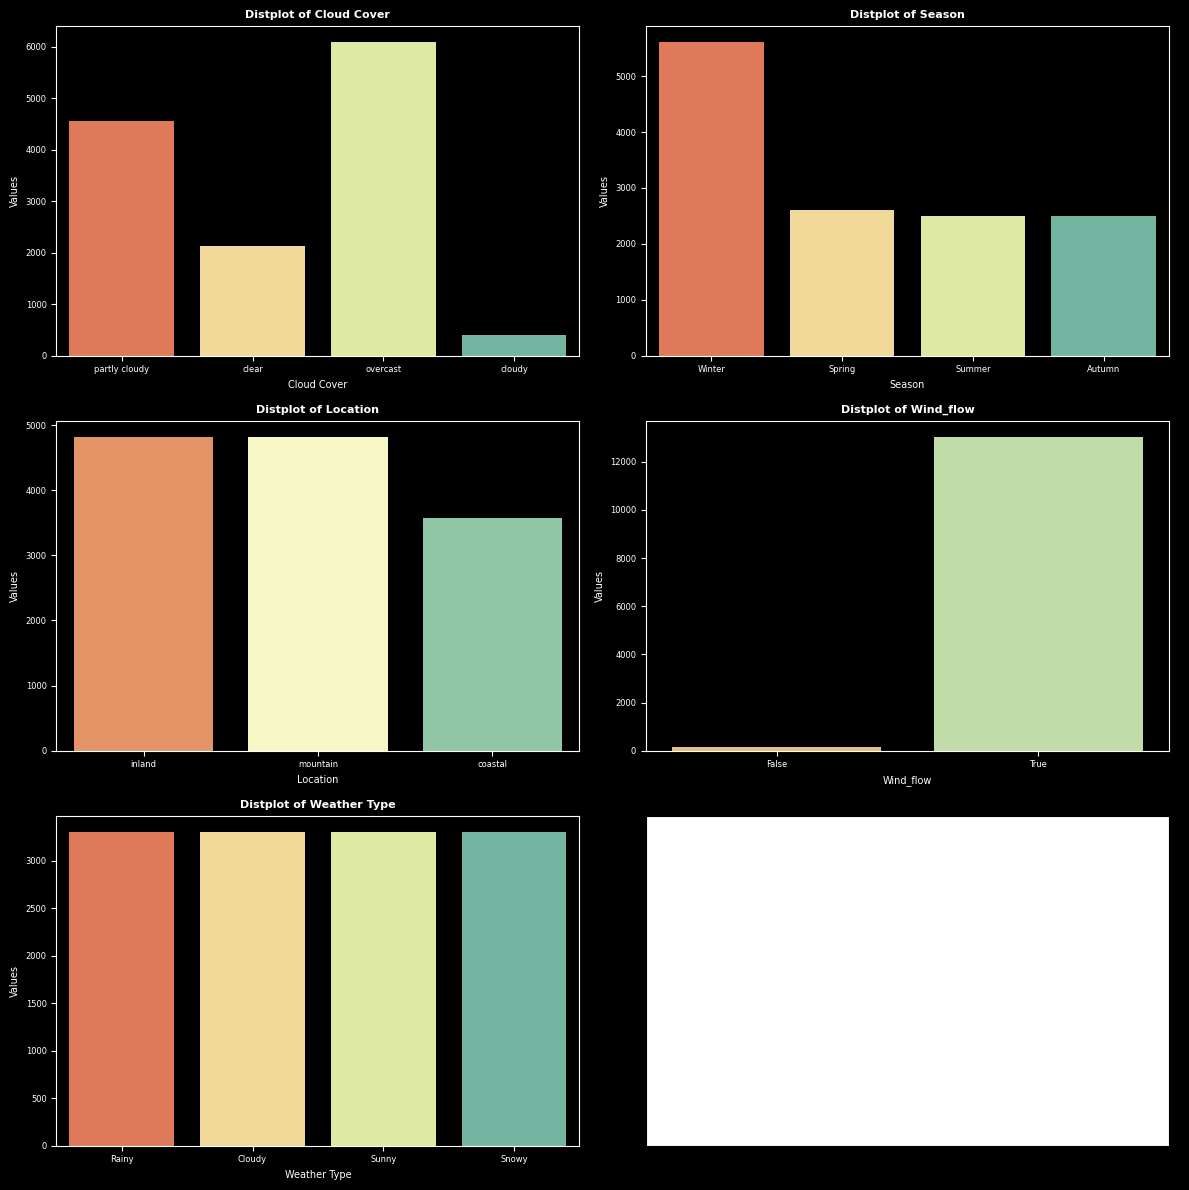

In [19]:
plot_count(df)

### cat and num vars

In [20]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [28]:
cats = np.stack([df[col].cat.codes for col in cat_cols],axis=1)
cats = torch.LongTensor(cats).to(device)

In [30]:
conts = np.stack([df[col].values for col in num_cols],axis=1)
conts = torch.Tensor(conts).to(device)

In [32]:
conts.shape

torch.Size([13200, 7])

In [33]:
cats.shape

torch.Size([13200, 4])

In [40]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
df['Weather Type'] = lbl_en.fit_transform(df['Weather Type'])

In [41]:
y = torch.tensor(df[target_col].values)

In [43]:
train_size = 0.8
train_idx = int(len(df)*train_size)

In [50]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(cat_sz,min(50,(cat_sz+1)//2)) for cat_sz in cat_szs]

In [51]:
emb_szs

[(4, 2), (4, 2), (3, 2), (2, 1)]

In [92]:
cat_train = cats[:train_idx]
cat_test = cats[train_idx:]
cont_train = conts[:train_idx]
cont_test = conts[train_idx:]
y_train = y[:train_idx].to(device)
y_test = y[train_idx:].to(device)

In [46]:
print(cat_train.shape)
print(cont_train.shape)
print(y_train.shape)
print(cat_test.shape)
print(cont_test.shape)
print(y_test.shape)

torch.Size([10560, 4])
torch.Size([10560, 7])
torch.Size([10560, 1])
torch.Size([2640, 4])
torch.Size([2640, 7])
torch.Size([2640, 1])


In [83]:
class Model(nn.Module):
    def __init__(self,emb_szs,n_conts,layers,out_size,p):
        super(Model,self).__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout()
        n_emb = sum([nf for ni,nf in emb_szs])
        self.bn = nn.BatchNorm1d(n_conts)
        n_in = n_emb+n_conts
        layerlist = []
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_size))
        self.layers = nn.Sequential(*layerlist)
    def forward(self,x_cat,x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        x_norm = self.bn(x_cont)
        x = torch.cat([x,x_norm],1)
        x = self.layers(x)
        return x

In [194]:
model = Model(emb_szs,conts.shape[1],[256,128,64,32,16,8],out_size=4,p=0.05).to(device)

In [195]:
num_epochs = 3000
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [196]:
losses = []
for epoch in range(num_epochs):
    y_pred = model.forward(cat_train,cont_train)
    loss = criterion(y_pred,y_train.squeeze())
    losses.append(loss.item())
    if (epoch+1)%100 == 0:
        print(f"epoch : {epoch+1}/{num_epochs} loss : {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch : 100/3000 loss : 0.6483005881309509
epoch : 200/3000 loss : 0.40330246090888977
epoch : 300/3000 loss : 0.29794472455978394
epoch : 400/3000 loss : 0.24095657467842102
epoch : 500/3000 loss : 0.20946696400642395
epoch : 600/3000 loss : 0.1779431849718094
epoch : 700/3000 loss : 0.16111762821674347
epoch : 800/3000 loss : 0.1472233235836029
epoch : 900/3000 loss : 0.13921791315078735
epoch : 1000/3000 loss : 0.5315088033676147
epoch : 1100/3000 loss : 0.19652751088142395
epoch : 1200/3000 loss : 0.17640380561351776
epoch : 1300/3000 loss : 0.1602563112974167
epoch : 1400/3000 loss : 0.14611957967281342
epoch : 1500/3000 loss : 0.13498342037200928
epoch : 1600/3000 loss : 0.12282044440507889
epoch : 1700/3000 loss : 0.11667360365390778
epoch : 1800/3000 loss : 0.11143986880779266
epoch : 1900/3000 loss : 0.11003264039754868
epoch : 2000/3000 loss : 0.10528097301721573
epoch : 2100/3000 loss : 0.09980274736881256
epoch : 2200/3000 loss : 0.09372897446155548
epoch : 2300/3000 loss :

In [197]:
with torch.no_grad():
    y_eval = model.forward(cat_test,cont_test)
#y_test = y_test.cpu().numpy()
y_eval = torch.argmax(y_eval,axis=1).cpu().numpy()
from sklearn.metrics import classification_report
print(classification_report(y_test,y_eval))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       646
           1       0.93      0.88      0.91       704
           2       0.91      0.93      0.92       640
           3       0.88      0.91      0.89       650

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

